In [3]:
import numpy as np 
import pandas as pd

traindf = pd.read_csv("C:\\Users\\pruth\\Downloads\\train (1).csv")
traindf
df1=traindf.drop(['Survived'],axis=1)
y_train=traindf['Survived']
y_train


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
df2 = pd.read_csv("C:\\Users\\pruth\\Downloads\\test.csv")
df2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
yx=pd.read_csv("C:\\Users\\pruth\\Downloads\\gender_submission.csv")
y_test=yx['Survived']
y_test


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [6]:

def preprocessdata(df):
    # df.info()

    # df.describe()

    # df.isnull().sum()

    # df.duplicated().sum()

    nmdf=df.select_dtypes(include=['number'])
    nmdf

    col=nmdf.columns
    col

    for c in col:
        col_mean=df[c].mean()
        df[c].fillna(col_mean,inplace=True)
    df

    df.isnull().sum()

    drop_col=['Cabin','Name','Ticket']

    df

    df.drop(drop_col,axis=1,inplace=True)
    df

    df['Embarked'].unique()

    columns_to_encode = ['Embarked', 'Sex']

    x = pd.get_dummies(df, columns=columns_to_encode)

    return x
x_train=preprocessdata(df1)
x_test= preprocessdata(df2)


In [7]:
bool_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']
x_train[bool_cols] = x_train[bool_cols].astype(int)


In [14]:
x_train=x_train.drop(['Embarked_Q','SibSp','PassengerId'],axis=1,inplace=True)

In [15]:
bool_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']
x_test[bool_cols] = x_test[bool_cols].astype(int)
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.50000,0,0,7.8292,0,1,0,0,1
1,893,3,47.00000,1,0,7.0000,0,0,1,1,0
2,894,2,62.00000,0,0,9.6875,0,1,0,0,1
3,895,3,27.00000,0,0,8.6625,0,0,1,0,1
4,896,3,22.00000,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,0,1,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,0,1,0
415,1307,3,38.50000,0,0,7.2500,0,0,1,0,1
416,1308,3,30.27259,0,0,8.0500,0,0,1,0,1


In [16]:

y_train=pd.DataFrame(y_train,columns=['Survived'])
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [17]:
y_test=pd.DataFrame(y_test,columns=['Survived'])
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


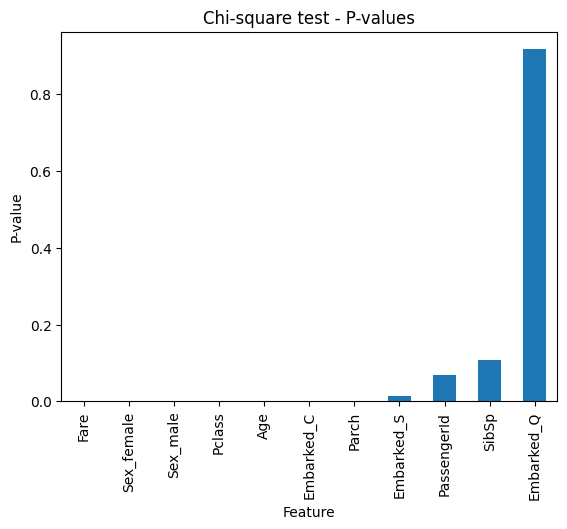

In [12]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest,chi2
import matplotlib.pyplot  as plt
# Calculate chi-squared stats
chi_scores = chi2(x_train, y_train)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = x_train.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()